In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
df.drop(columns='Address', inplace=True)

In [8]:
df.drop(columns='Customer Id', inplace=True)

In [30]:
df['Defaulted'] = df['Defaulted'].fillna(0)

df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df)

data[:5, :]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

In [51]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, init='random')
kmean.fit(data)

KMeans(init='random', n_clusters=3)

In [53]:
df['cluster'] = kmean.labels_

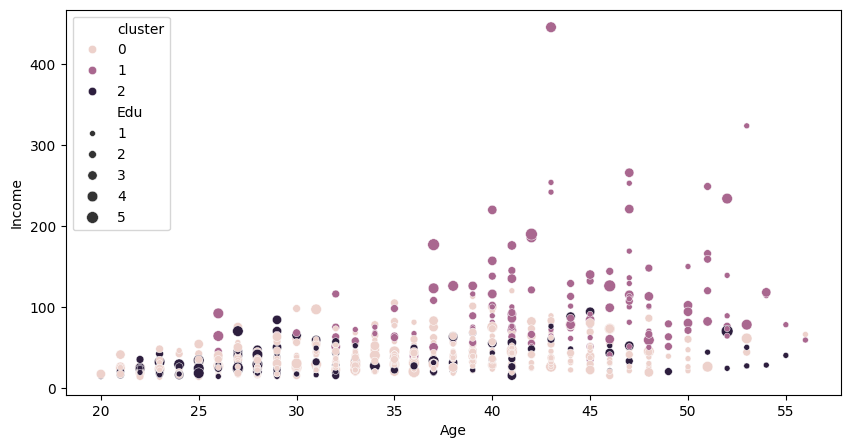

In [61]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Income', hue='cluster', size='Edu')

plt.show()